In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt


from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# Data Loading

In [4]:
company='GOOGL'
start =dt.datetime(2012,1,1)
end =dt.datetime(2021,12,31)

data = web.DataReader(company, 'yahoo' , start, end)

# EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2012-01-03 to 2021-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2517 non-null   float64
 1   Low        2517 non-null   float64
 2   Open       2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Volume     2517 non-null   float64
 5   Adj Close  2517 non-null   float64
dtypes: float64(6)
memory usage: 137.6 KB


In [34]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
High,2517.0,5.013303e+01,3.126432e+01,1.412713e+01,2.763950e+01,4.132900e+01,6.052200e+01,1.509665e+02
Low,2517.0,4.921676e+01,3.068685e+01,1.392693e+01,2.722450e+01,4.073050e+01,5.956200e+01,1.488990e+02
Open,2517.0,4.968180e+01,3.097492e+01,1.402252e+01,2.741400e+01,4.114400e+01,6.007000e+01,1.499755e+02
Close,2517.0,4.969554e+01,3.099609e+01,1.399024e+01,2.743200e+01,4.107450e+01,6.026350e+01,1.498385e+02
Volume,2517.0,4.972128e+07,3.675455e+07,9.312000e+06,2.773400e+07,3.660400e+07,6.169000e+07,4.971983e+08
Adj Close,2517.0,4.969554e+01,3.099609e+01,1.399024e+01,2.743200e+01,4.107450e+01,6.026350e+01,1.498385e+02


In [35]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,16.720470,16.325577,16.339840,16.651901,146912940.0,16.651901
2012-01-04,16.773024,16.532032,16.642391,16.723724,114445440.0,16.723724
2012-01-05,16.615866,16.422173,16.569820,16.491741,131184684.0,16.491741
2012-01-06,16.516518,16.261011,16.495245,16.266768,107608284.0,16.266768
2012-01-09,16.191191,15.546296,16.178679,15.577077,232671096.0,15.577077


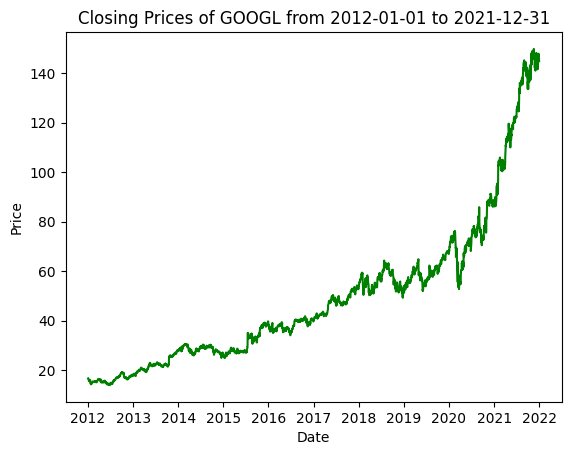

In [41]:
plt.plot(data.index, data['Close'], color='green')
plt.title(f"Closing Prices of {company} from {start.date()} to {end.date()}")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Data Preparation

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))
prediction_days=90
x_train = []
y_train = []

for x in range (prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x ,0])
    y_train.append(scaled_data[x,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

# Model Building

In [7]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile (optimizer = 'adam', loss='mean_squared_error')
model.fit (x_train, y_train, epochs=25, batch_size=32)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-11-14 09:49:37.013585: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-14 09:49:37.014088: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/25


2022-11-14 09:49:37.846536: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-14 09:49:40.345941: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-14 09:49:40.745481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-14 09:49:40.936648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-14 09:49:41.083727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-14 09:49:41.215409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-14 09:49:41.406160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114

76/76 [==============================] - 12s 98ms/step - loss: 0.0072
Epoch 2/25
76/76 [==============================] - 6s 81ms/step - loss: 7.4640e-04
Epoch 3/25
76/76 [==============================] - 6s 81ms/step - loss: 5.8789e-04
Epoch 4/25
76/76 [==============================] - 6s 81ms/step - loss: 5.6596e-04
Epoch 5/25
76/76 [==============================] - 6s 82ms/step - loss: 5.1902e-04
Epoch 6/25
76/76 [==============================] - 6s 82ms/step - loss: 4.7562e-04
Epoch 7/25
76/76 [==============================] - 6s 82ms/step - loss: 4.9791e-04
Epoch 8/25
76/76 [==============================] - 6s 82ms/step - loss: 4.4731e-04
Epoch 9/25
76/76 [==============================] - 6s 82ms/step - loss: 3.7562e-04
Epoch 10/25
76/76 [==============================] - 6s 82ms/step - loss: 3.6822e-04
Epoch 11/25
76/76 [==============================] - 6s 81ms/step - loss: 4.2219e-04
Epoch 12/25
76/76 [==============================] - 6s 81ms/step - loss: 3.3103e-04
Epo

# Adquiring and Loading Test Data

In [8]:
test_start = dt.datetime(2022,1,1)
test_end =dt.datetime.now()

test_data = web.DataReader(company, 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_imputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_imputs = model_imputs.reshape(-1, 1)
model_imputs = scaler.transform(model_imputs)

# Predictions on test data

2022-11-14 09:52:30.462190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-14 09:52:30.590836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-14 09:52:30.718390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-14 09:52:30.853169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/7 [=======>......................] - ETA: 0s

2022-11-14 09:52:30.988252: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 2s 106ms/step


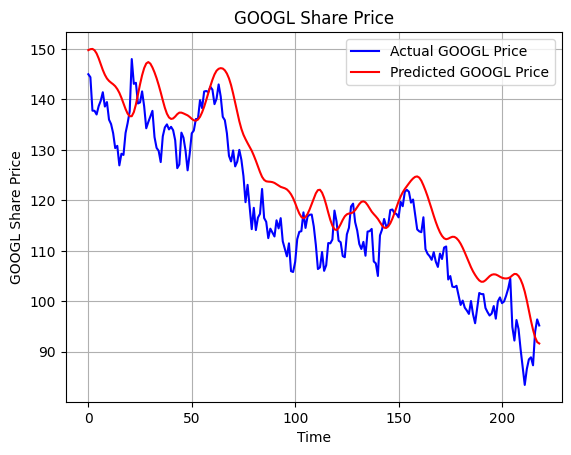

In [9]:
x_test =[]
for x in range(prediction_days, len(model_imputs)):
    x_test.append(model_imputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

plt.plot(actual_prices, color="blue", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="red", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.grid(True)
plt.legend()
plt.show ()

# Prediction of the next day

In [10]:
real_data = [model_imputs[len(model_imputs)+1 - prediction_days:len(model_imputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction {prediction}")

2022-11-14 09:52:40.553121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-14 09:52:40.681310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-14 09:52:40.839232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-14 09:52:40.959613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
Prediction [[92.03466]]


2022-11-14 09:52:41.090410: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


# Exporting the Model and Scaler for deployment

In [21]:
import pickle

pickle.dump(model, open('stock_pred.pkl', 'wb'))
pickle.dump(scaler, open('stock_scaler.pkl','wb'))

INFO:tensorflow:Assets written to: ram://1bcce61c-13ea-41ac-88a9-458976f76ee4/assets


INFO:tensorflow:Assets written to: ram://1bcce61c-13ea-41ac-88a9-458976f76ee4/assets
